In [6]:
pip install pandas_datareader

In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [10]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()

C:\Users\shivam\AppData\Local\Temp\ipykernel_18072\2343317625.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.418381,6.433077,6.369496,6.400986,493729600
2010-01-05,6.429482,6.465771,6.395591,6.436080,601904800
2010-01-06,6.327210,6.454972,6.320612,6.429479,552160000
2010-01-07,6.315512,6.358100,6.269626,6.350602,477131200
2010-01-08,6.357500,6.358100,6.269927,6.307115,447610800


In [11]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.418381,6.433077,6.369496,6.400986,493729600
2010-01-05,6.429482,6.465771,6.395591,6.436080,601904800
2010-01-06,6.327210,6.454972,6.320612,6.429479,552160000
2010-01-07,6.315512,6.358100,6.269626,6.350602,477131200
2010-01-08,6.357500,6.358100,6.269927,6.307115,447610800


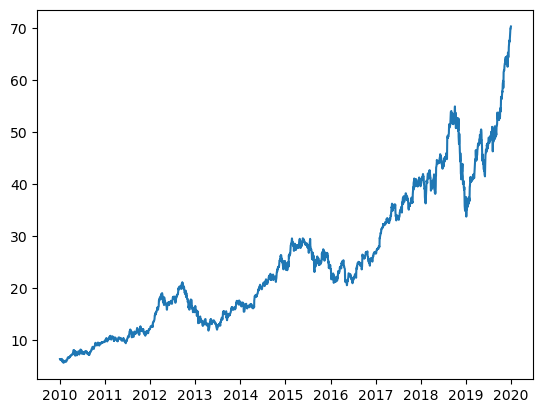

In [12]:
plt.plot(df.Close)

In [13]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.418381,6.433077,6.369496,6.400986,493729600
2010-01-05,6.429482,6.465771,6.395591,6.436080,601904800
2010-01-06,6.327210,6.454972,6.320612,6.429479,552160000
2010-01-07,6.315512,6.358100,6.269626,6.350602,477131200
2010-01-08,6.357500,6.358100,6.269927,6.307115,447610800
...,...,...,...,...,...
2019-12-23,68.523346,68.583666,67.647501,67.686106,98572000
2019-12-24,68.588470,68.738070,68.262749,68.689811,48478800


In [14]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2019-12-23,57.017865
2019-12-24,57.214823
2019-12-26,57.450983


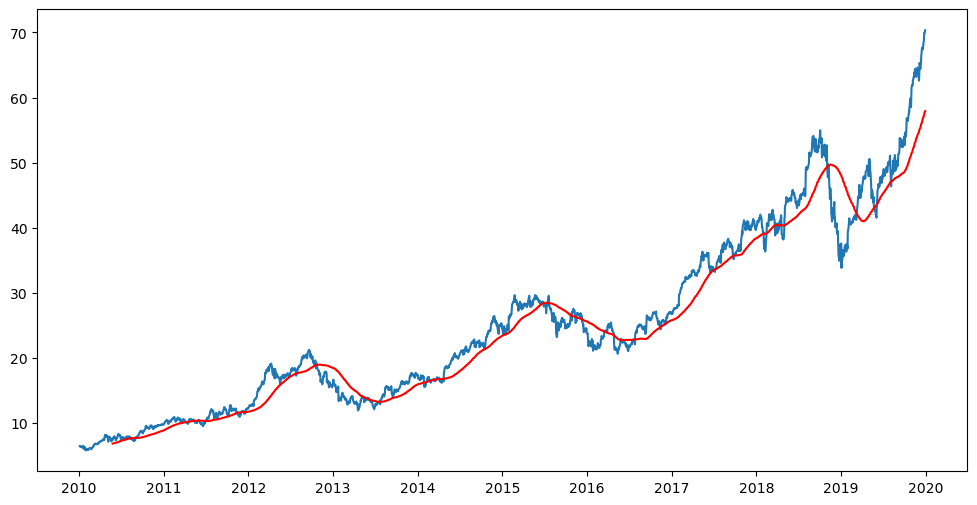

In [15]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2019-12-23,51.986696
2019-12-24,52.113698
2019-12-26,52.246549


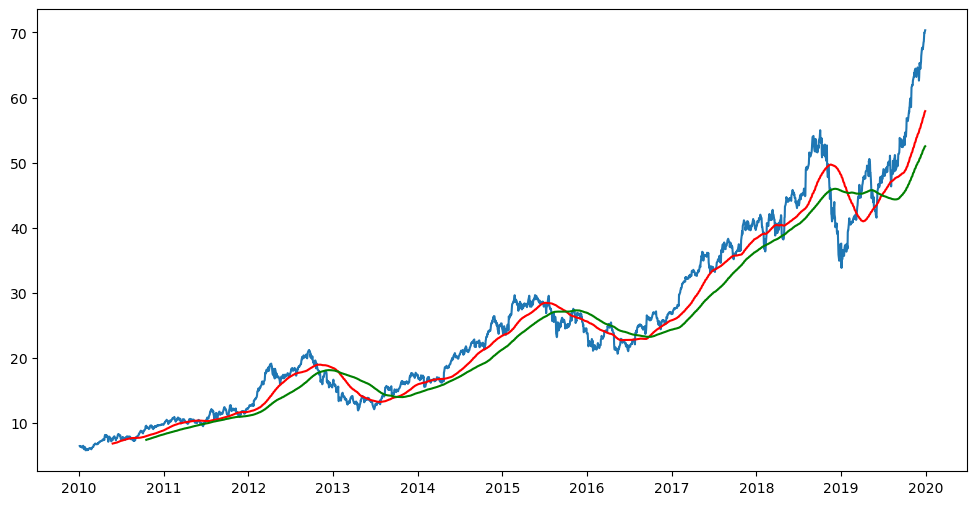

In [17]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200, 'g')

In [18]:
df.shape

(2515, 5)

In [19]:
# splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  = pd.DataFrame(df['Close'][int(len(df)*0.70): len(df)])

print(data_training.shape)
print(data_testing.shape)


(1760, 1)
(755, 1)


In [20]:
data_training.head()

Ticker,AAPL
Date,
2010-01-04,6.418381
2010-01-05,6.429482
2010-01-06,6.327210
2010-01-07,6.315512
2010-01-08,6.357500


In [21]:
data_testing.head()

Ticker,AAPL
Date,
2016-12-29,26.904564
2016-12-30,26.694824
2017-01-03,26.770882
2017-01-04,26.740913
2017-01-05,26.876907


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02759996],
       [0.02806514],
       [0.02377926],
       ...,
       [0.88408403],
       [0.89123186],
       [0.88640219]])

In [24]:
data_training_array.shape

(1760, 1)

In [25]:
# x_train = []
# y_train = []

# for i in range (100, data_training_array.shape[0]):
#     x_tarin.append(data_training_array[i-100: i])
#     Y_train.append(data_training_array[i, 0])

# x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [27]:
# ML model

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

C:\Users\shivam\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input

model = Sequential()

model.add(Input(shape=(x_train.shape[1], 1)))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 230ms/step - loss: 0.0604
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - loss: 0.0124
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - loss: 0.0102
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - loss: 0.0100
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - loss: 0.0096
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - loss: 0.0096
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - loss: 0.0089
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 227ms/step - loss: 0.0074
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - loss: 0.0071
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - loss: 0.0079
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step - loss: 0.0070
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - loss: 0.0069
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - loss: 0.0067
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - loss: 0.0062
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [33]:
model.save('keras_moodel.h5')

In [34]:
data_testing.head()

Ticker,AAPL
Date,
2016-12-29,26.904564
2016-12-30,26.694824
2017-01-03,26.770882
2017-01-04,26.740913
2017-01-05,26.876907


In [35]:
past_100_days = data_training.tail(100)

In [37]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [38]:
final_df.head()

Ticker,AAPL
0,24.850124
1,24.951017
2,24.765274
3,24.749226
4,24.806549


In [39]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0257357 ],
       [0.02789665],
       [0.02391836],
       [0.02357463],
       [0.0248024 ],
       [0.0311872 ],
       [0.030696  ],
       [0.02991033],
       [0.02922271],
       [0.03059783],
       [0.0264232 ],
       [0.02809291],
       [0.02406571],
       [0.02180635],
       [0.01871243],
       [0.01812301],
       [0.01409562],
       [0.01458666],
       [0.01768091],
       [0.02259239],
       [0.02244495],
       [0.02568656],
       [0.01173813],
       [0.        ],
       [0.01134522],
       [0.02367288],
       [0.04243433],
       [0.06109745],
       [0.05790511],
       [0.05132381],
       [0.05127462],
       [0.05117666],
       [0.05643166],
       [0.04705093],
       [0.04788587],
       [0.0489173 ],
       [0.05314095],
       [0.04444797],
       [0.04872088],
       [0.04611759],
       [0.04847528],
       [0.04872088],
       [0.05284636],
       [0.05368122],
       [0.06345481],
       [0.06468274],
       [0.06979055],
       [0.068

In [40]:
input_data.shape

(855, 1)

In [41]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [42]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [43]:
# to make prediction

In [44]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step


In [45]:
y_predicted.shape

(755, 1)

In [46]:
y_test

array([0.06973814, 0.06524589, 0.0668749 , 0.06623304, 0.06914578,
       0.07556331, 0.08089486, 0.0814873 , 0.08464667, 0.08217843,
       0.08114169, 0.08588085, 0.08583142, 0.08479468, 0.08588085,
       0.08627564, 0.08573272, 0.09516149, 0.09545783, 0.09550701,
       0.09392735, 0.0925452 , 0.12907597, 0.12798984, 0.13070506,
       0.13667824, 0.14279947, 0.14531718, 0.15002729, 0.14853983,
       0.15434077, 0.16291794, 0.16534745, 0.1645541 , 0.16638872,
       0.17124766, 0.17328033, 0.17040464, 0.17104932, 0.17238809,
       0.17268549, 0.1865677 , 0.182453  , 0.18651818, 0.18433677,
       0.18522906, 0.18265097, 0.1810646 , 0.18334496, 0.1836422 ,
       0.18260137, 0.18988954, 0.19103021, 0.18755934, 0.19484783,
       0.18681583, 0.19464904, 0.1921703 , 0.19078207, 0.19197184,
       0.20644914, 0.20803584, 0.20709403, 0.20575515, 0.20595353,
       0.21125865, 0.20754022, 0.20575515, 0.20416838, 0.20332576,
       0.19569044, 0.19653338, 0.19281487, 0.19668224, 0.19355

In [47]:
y_predicted

array([[0.113543  ],
       [0.11421673],
       [0.11481154],
       [0.1153056 ],
       [0.11568956],
       [0.11596453],
       [0.11615117],
       [0.11628917],
       [0.11642192],
       [0.11658554],
       [0.11680472],
       [0.11708352],
       [0.1174206 ],
       [0.11781533],
       [0.1182581 ],
       [0.11873482],
       [0.11923191],
       [0.11973467],
       [0.12024133],
       [0.12076433],
       [0.12131028],
       [0.12187803],
       [0.12245685],
       [0.12309362],
       [0.12388001],
       [0.12487645],
       [0.12612624],
       [0.12766114],
       [0.12948954],
       [0.13161264],
       [0.13400936],
       [0.13664892],
       [0.13951498],
       [0.14259347],
       [0.14585549],
       [0.14926235],
       [0.15278132],
       [0.15638314],
       [0.16002935],
       [0.16364805],
       [0.16719674],
       [0.17063884],
       [0.1739547 ],
       [0.17712463],
       [0.18013322],
       [0.18296425],
       [0.1856037 ],
       [0.188

In [48]:
scaler.scale_

array([0.02141822])

In [49]:
scale_factor = 1/0.02141822
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

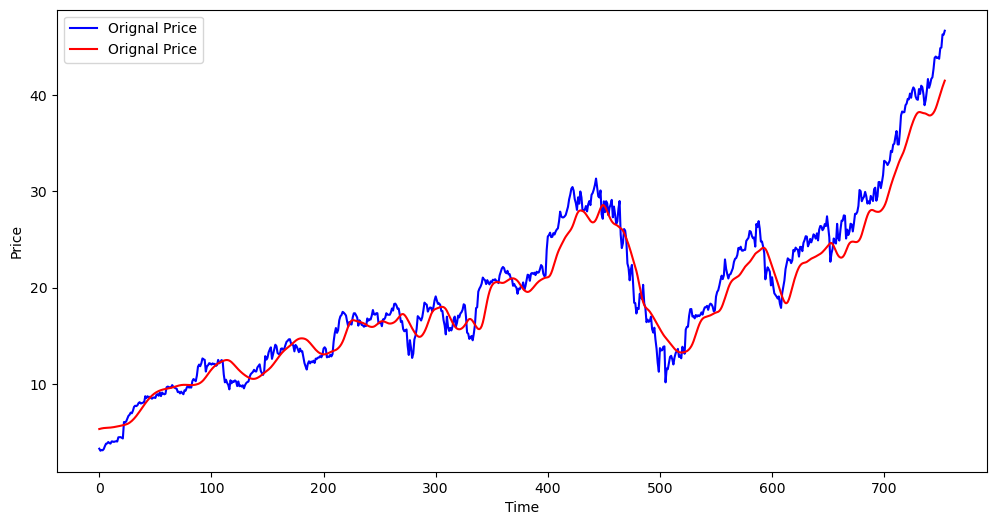

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = 'Orignal Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()